In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

In [22]:
cols = ["survived", "pclass", "age", "fare"]

df = sns.load_dataset("titanic")[cols].dropna()
print(df)

corr = df.corr()
print(corr)
#corr은 상관계수 변수간에 서로 얼마나 관계가 있는지를 수치로 나타낸 것

     survived  pclass   age     fare
0           0       3  22.0   7.2500
1           1       1  38.0  71.2833
2           1       3  26.0   7.9250
3           1       1  35.0  53.1000
4           0       3  35.0   8.0500
..        ...     ...   ...      ...
885         0       3  39.0  29.1250
886         0       2  27.0  13.0000
887         1       1  19.0  30.0000
889         1       1  26.0  30.0000
890         0       3  32.0   7.7500

[714 rows x 4 columns]
          survived    pclass       age      fare
survived  1.000000 -0.359653 -0.077221  0.268189
pclass   -0.359653  1.000000 -0.369226 -0.554182
age      -0.077221 -0.369226  1.000000  0.096067
fare      0.268189 -0.554182  0.096067  1.000000


In [23]:
import pandas as pd
import random

#랜덤하게 각 주식의 가격 100개의 데이터 생성

#Samsung
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000,90000) for _ in range(100)]
samsung_data = {'Date' : dates, '005930.KS' : samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)
#인덱스를 Date로 지정
print(samsung_df)

#LG
lg_prices = [random.randint(140000,160000) for _ in range(100)]
lg_data = {'Date' : dates, '066570.KS' : lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)
print(lg_df)

#두개의 프레임 합치기
df = pd.concat([samsung_df, lg_df] , axis=1)
df = df.loc[:, ['005930.KS', '066570.KS']]
df.columns = ['Samsung', 'LG']
print(df)

#폴더 생성
os.makedirs("./data", exist_ok=True)

#저장
df.to_csv("./data/stock_price.csv")

            005930.KS
Date                 
2021-01-04      86876
2021-01-05      80608
2021-01-06      89827
2021-01-07      89760
2021-01-08      88195
...               ...
2021-04-09      82664
2021-04-10      80355
2021-04-11      83446
2021-04-12      85236
2021-04-13      85312

[100 rows x 1 columns]
            066570.KS
Date                 
2021-01-04     143365
2021-01-05     142169
2021-01-06     151118
2021-01-07     150869
2021-01-08     147279
...               ...
2021-04-09     147180
2021-04-10     159806
2021-04-11     158504
2021-04-12     148314
2021-04-13     152396

[100 rows x 1 columns]
            Samsung      LG
Date                       
2021-01-04    86876  143365
2021-01-05    80608  142169
2021-01-06    89827  151118
2021-01-07    89760  150869
2021-01-08    88195  147279
...             ...     ...
2021-04-09    82664  147180
2021-04-10    80355  159806
2021-04-11    83446  158504
2021-04-12    85236  148314
2021-04-13    85312  152396

[100 rows x 2 c

In [27]:
#csv 읽기
df = pd.read_csv("./data/stock_price.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df)

#두 종목의 수익률 계산
returns = df.pct_change()
print(returns)

#수익률 간의 상관 계수 계산
corr_matrix = returns.corr()
print(corr_matrix)

            Samsung      LG
Date                       
2021-01-04    86876  143365
2021-01-05    80608  142169
2021-01-06    89827  151118
2021-01-07    89760  150869
2021-01-08    88195  147279
...             ...     ...
2021-04-09    82664  147180
2021-04-10    80355  159806
2021-04-11    83446  158504
2021-04-12    85236  148314
2021-04-13    85312  152396

[100 rows x 2 columns]
             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05 -0.072149 -0.008342
2021-01-06  0.114368  0.062946
2021-01-07 -0.000746 -0.001648
2021-01-08 -0.017435 -0.023795
...              ...       ...
2021-04-09 -0.050875 -0.057855
2021-04-10 -0.027932  0.085786
2021-04-11  0.038467 -0.008147
2021-04-12  0.021451 -0.064289
2021-04-13  0.000892  0.027523

[100 rows x 2 columns]
          Samsung        LG
Samsung  1.000000  0.049474
LG       0.049474  1.000000


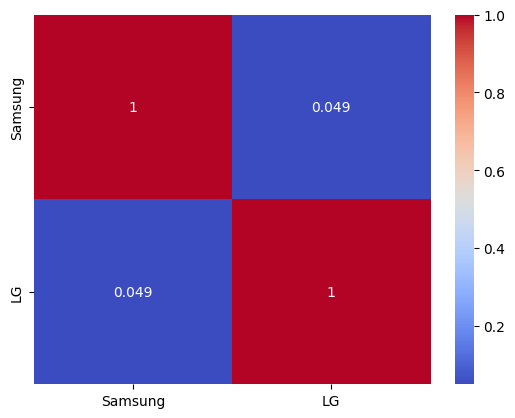

In [32]:
#히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()
#삼성과 LG는 서로 상관관계가 없다.